In [1]:
Sys.setlocale(category = "LC_ALL", locale = "en_US.UTF-8")

[1] "en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/C"

# Dependencies

In [2]:
pacman::p_load(dplyr, ggplot2, ggbeeswarm, ggpubr, ggsignif, cowplot, ggh4x, ggrepel, ComplexHeatmap)

# Functions

In [5]:
source("/Users/anabbi/git/ped_CapTCRseq/R/ggplot2_theme.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/color_schemes.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/Misc_functions.R")

# Paths

In [6]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Plots/"
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Manifests/"
gitpath <- "/Users/anabbi/git/ped_CapTCRseq/"

In [7]:
h4hpath <- "/Users/anabbi/Desktop/H4H/INTERCEPT/"

# Main

In [8]:
meta_div <- readr::read_rds(paste0(datapath, "capTCRseq/meta_div_goodsamples.rds"))

In [9]:
meta_div <- meta_div[ meta_div$cancergroup != "Normal", ]
meta_div <- meta_div[ meta_div$cancergroup != "LFS", ]

In [10]:
table(meta_div$sampletype, useNA = "always")


cfDNA  PBMC Tumor  <NA> 
  274   534    18     0 

Separate PBMC and cfDNA

In [11]:
table(meta_div$cancergroup)


           Leukemia            Lymphoma        Solid tumors T-cell malignancies 
                370                 138                 274                  44 

In [12]:
meta_div <- meta_div[ meta_div$cancergroup != "T-cell malignancies", ]

In [13]:
pbmc <- meta_div[ which(meta_div$sampletype == "PBMC"),]
cfdna <- meta_div[ which(meta_div$sampletype == "cfDNA"),]

In [14]:
# Tcells <- meta_div[ which(meta_div$cancergroup == "T-cell malignancies"),]
# Tcells <- Tcells[ !is.na(Tcells$CD3),]
# Tcells <- Tcells[ Tcells$CD3 > 0,]

## Change relative to with baseline

### PBMC

In [15]:
pbmc <- meta_div[ which(meta_div$sampletype == "PBMC"),]
pbmc <- pbmc[ !is.na(pbmc$TRB),]

In [16]:
diff_log10shann <- calculate_delta.fx(pbmc, "cycle", "log10shann")

In [17]:
# 25% 75% intercepts
# myintercepts <- quantile(diff_log10shann$Difference[diff_log10shann$Difference != 0], c(0.25, 0.75) )

In [18]:
colnames(diff_log10shann)

[1] "sample_id"          "Patient"            "cycle"             
 [4] "FOLD"               "ATC"                "Age"               
 [7] "Disease_type"       "TE_fold"            "CD3"               
[10] "EM"                 "CM"                 "Naïve"             
[13] "SCM"                "TE"                 "EM%"               
[16] "CM%"                "Naïve%"             "SCM%"              
[19] "TE%"                "Naïve/TE"           "N+CM+SCM/TE+EM"    
[22] "PD-1"               "PDL1"               "LAG3"              
[25] "TIM3"               "CTLA4"              "PD1%"              
[28] "PDL1%"              "LAG3%"              "TIM3%"             
[31] "CTLA4%"             "Any NCR"            "PD1 + LAG3 + TIM3" 
[34] "cancergroup"        "agegroup"           "foldgroup"         
[37] "Remission"          "Relapse"            "Transplant"        
[40] "CART"               "vital_status"       "LOF"               
[43] "TRB"                "Reads"              "CPKR"              
[46] "Average_reads"      "VMR"                "Max_reads"         
[49] "Singletons"         "Doubletons"         "qD"                
[52] "Sample_Coverage"    "observed_Richness"  "estimated_Richness"
[55] "SE_Richeness"       "observed_Shannon"   "estimated_Shannon" 
[58] "SE_Shannon"         "observed_Simpson"   "estimated_Simpson" 
[61] "SE_Simpson"         "basename"           "file"              
[64] "sampletype"         "Group"              "log10shann"        
[67] "Difference"

In [19]:
# diff_log10shann$Difference_scaled<- scale(diff_log10shann$Difference)

In [20]:
# diff_log10shann$Difference_scaled[diff_log10shann$cycle == "X01"] <- 0

In [21]:
# summary(diff_log10shann$Difference_scaled)

In [22]:
summary(diff_log10shann$Difference)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.04107 -0.14239  0.00000  0.08358  0.24032  2.01922 

In [23]:
diff_log10shann <- diff_log10shann[ !is.na(diff_log10shann$Difference),]

In [24]:
# diff_log10shann$Difference <- diff_log10shann$Difference_scaled

In [25]:
p_shann <- delta_basespiderplot.fx(diff_log10shann[ diff_log10shann$cancergroup == "Leukemia",], "cycle", "cancergroup", group_col)

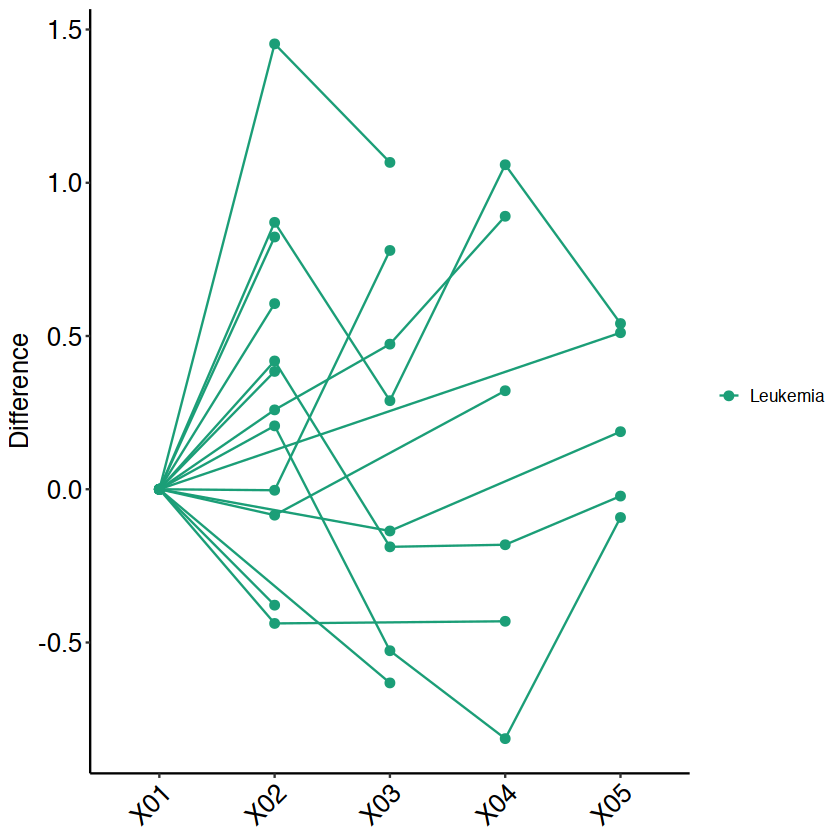

In [26]:
p_shann

In [27]:
p_shann <- p_shann + geom_hline(yintercept = 0, linetype = "dashed", color = "grey")

In [28]:
# get the last timepoint for each patient
last_timepoint <- diff_log10shann %>%
    group_by(Patient) %>%
    filter(cycle == max(cycle))

In [29]:
dim(last_timepoint)

[1] 32 67

In [30]:
last_timepoint$cycleno <- as.numeric(gsub("X0", "", last_timepoint$cycle) )

In [31]:
# p0 <- p0 + geom_text_repel(
#     data = last_timepoint,
#     aes(label = Disease_type),
#     hjust = "left",
#     direction = "y",
#     nudge_x = 6.5 - last_timepoint$cycleno,
#     size = 3,
#     xlim = c(6, NA),
#     segment.color = NA
# ) + facet_wrap(~cancergroup, nrow = 1)


Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


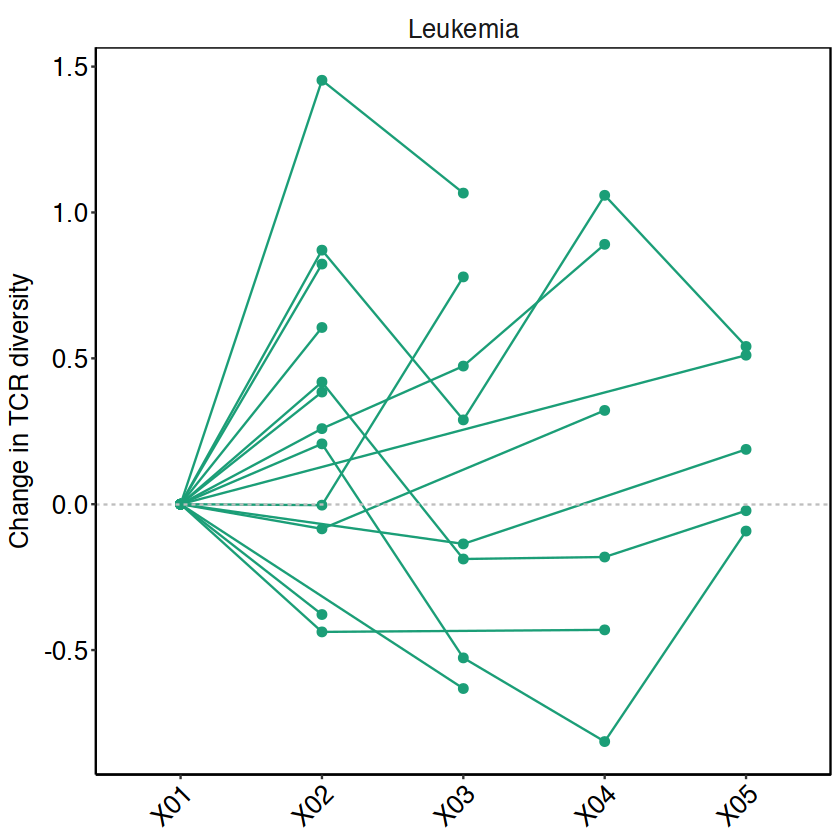

In [32]:
p_shann + theme(legend.position = "none")+ 
theme(strip.background = element_blank(),
          strip.text = element_text(size = 15),
          strip.placement = "outside",
          panel.border = element_rect(color = "black", fill = NA, size = 0.5)) +
          ylab("Change in TCR diversity") + facet_wrap(~cancergroup, nrow = 1)

In [33]:
pdf(paste0(plotpath, "delta_shann_cancergroup_facet.pdf"), width = 10, height = 6)
p_shann + theme(legend.position = "none")+ 
theme(strip.background = element_blank(),
          strip.text = element_text(size = 15),
          strip.placement = "outside",
          panel.border = element_rect(color = "black", fill = NA, size = 0.5)) +
          facet_wrap(~cancergroup, nrow = 1) + 
          ylab("Change in TCR diversity") +
          scale_x_discrete(get_breaks("cycle"), labels = c("Pre-cycle 1", "Pre-cycle 2", "Pre-cycle 3", "Pre-cycle 4", "Pre-cycle 5"), expand = expansion(mult = c(0.1,0.8)))
dev.off()

pdf 
  2

### cfDNA

In [34]:
diff_log10shann_cfdna <- calculate_delta.fx(cfdna, "cycle", "log10shann")

In [35]:
summary(diff_log10shann_cfdna$Difference)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
-1.46443 -0.22322  0.00000 -0.01598  0.15663  1.61308       20 

In [36]:
# diff_log10shann_cfdna$Difference[diff_log10shann_cfdna$cycle == "X01"] <- 0

In [37]:
# 25% 75% intercepts
# myintercepts <- quantile(diff_log10shann_cfdna$Difference[diff_log10shann_cfdna$Difference != 0], c(0.25, 0.75) )

In [38]:
# diff_log10shann_cfdna$Relapse[is.na(diff_log10shann_cfdna$Relapse)] <- 0

In [39]:
# diff_log10shann_cfdna$Relapse <- as.character(diff_log10shann_cfdna$Relapse)

In [40]:
diff_log10shann_cfdna <- diff_log10shann_cfdna[ !is.na(diff_log10shann_cfdna$Difference),]

In [41]:
p_cfshann <- delta_basespiderplot.fx(diff_log10shann_cfdna, "cycle", "cancergroup", group_col)

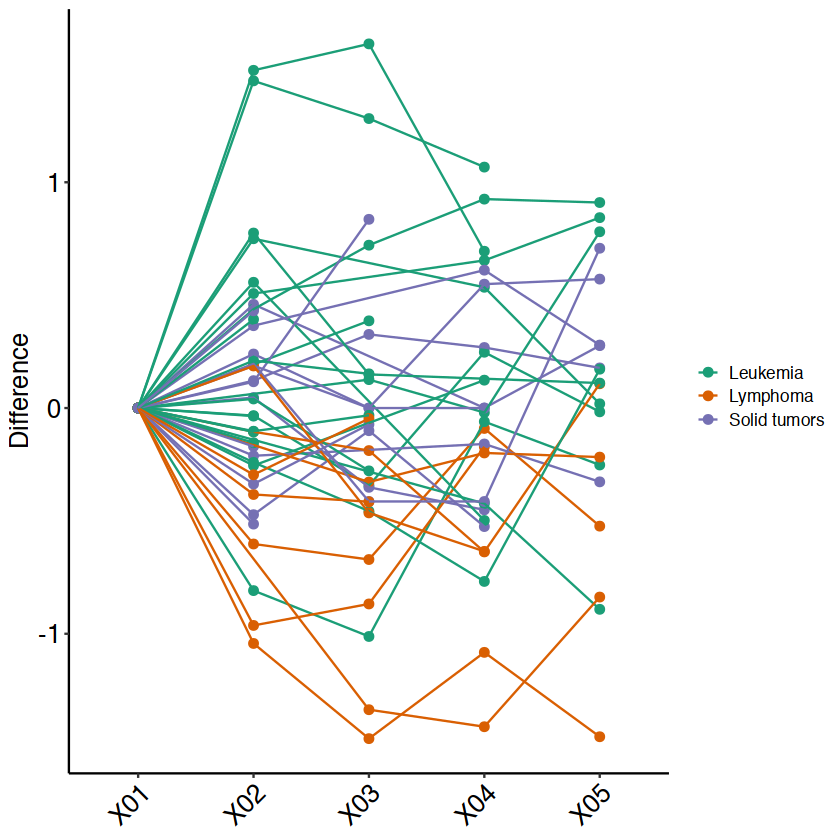

In [42]:
p_cfshann

In [43]:
p_cfshann <- p_cfshann + geom_hline(yintercept = 0, linetype = "dashed", color = "grey")

In [44]:
# last_timepoint <- diff_log10shann_cfdna %>%
#     group_by(Patient) %>%
#     filter(cycle == max(cycle))

In [45]:
# last_timepoint$cycleno <- as.numeric(gsub("X0", "", last_timepoint$cycle) )

In [134]:
# p1 <- p1 + geom_text_repel(
#     data = last_timepoint,
#     aes(label = Disease_type),
#     hjust = "left",
#     direction = "y",
#     nudge_x = 6.5 - last_timepoint$cycleno,
#     size = 3,
#     xlim = c(6, NA),
#     segment.color = NA,
# ) + facet_wrap(~cancergroup, nrow = 1)

In [135]:
# pdf(paste0(plotpath, "delta_cfDNAshann_cancergroup_facet.pdf"), width = 10, height = 6)
# p_cfshann + theme(legend.position = "none") +
#     theme(
#         strip.background = element_blank(),
#         strip.text = element_text(size = 15),
#         strip.placement = "outside",
#         panel.border = element_rect(color = "black", fill = NA, size = 0.5)
#     ) + facet_wrap(~cancergroup, nrow = 1) +
#     ylab("Change in cfTCR diversity") +
#     scale_x_discrete(get_breaks("cycle"), labels = c("Pre-cycle 1", "Pre-cycle 2", "Pre-cycle 3", "Pre-cycle 4", "Pre-cycle 5"), expand = expansion(mult = c(0.1, 0.8)))

# dev.off()


pdf 
  2

### Flow

In [46]:
pbmc1 <- meta_div[ meta_div$sampletype == "PBMC" & !is.na(meta_div$CD3),]
pbmc1 <- pbmc1[ pbmc1$CD3 > 0,]

In [47]:
mycells <- c("Naïve%", "SCM%", "CM%", "EM%", "TE%", "LAG3%", "TIM3%", "PD1%")

In [48]:
# subset to samples with no NA in `Naïve%`, `CM%`, `EM%`, `TEMRA%`. use apply
# to subset to samples with no NA in any of these columns
pbmc1 <- pbmc1[ apply(pbmc1[ , mycells], 1, function(x) !any(is.na(x)) ), ]

In [49]:
mycells <- c("`Naïve%`", "`SCM%`", "`CM%`", "`EM%`", "`TE%`", "`LAG3%`", "`TIM3%`", "`PD1%`")

In [50]:
for (i in 1:length(mycells)) {
    pbmc1$grp <- gsub("`", "", mycells[i])
    mycol <- paste0("Diff_", gsub("%", "", pbmc1$grp[1]))
    mydiff <- calculate_delta.fx(pbmc1, "cycle", mycells[i])
    pbmc1[[mycol]] <- mydiff$Difference[ match(pbmc1$sample_id, mydiff$sample_id) ]
}

In [51]:
# pivot_longer
pbmc1_long <- pbmc1 %>%
    select(sample_id, Patient, cycle, cancergroup, Diff_Naïve, Diff_SCM, Diff_CM, Diff_EM, Diff_TE,
    Diff_PD1, Diff_LAG3, Diff_TIM3) %>%
    tidyr::pivot_longer(cols = starts_with("Diff_"), names_to = "Celltype", values_to = "Diff")

In [52]:
head(pbmc1_long)

sample_id,Patient,cycle,cancergroup,Celltype,Diff
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
CHP_343_02,CHP_343,X02,Solid tumors,Diff_Naïve,-9.541512
CHP_343_02,CHP_343,X02,Solid tumors,Diff_SCM,4.294836
CHP_343_02,CHP_343,X02,Solid tumors,Diff_CM,15.009853
CHP_343_02,CHP_343,X02,Solid tumors,Diff_EM,1.368386
CHP_343_02,CHP_343,X02,Solid tumors,Diff_TE,-11.131564
CHP_343_02,CHP_343,X02,Solid tumors,Diff_PD1,4.269288


In [53]:
pbmc1_long_cells <- pbmc1_long[ pbmc1_long$Celltype %in% c("Diff_Naïve", "Diff_SCM", "Diff_CM", "Diff_EM", "Diff_TE"), ]
pbmc1_long_ic <- pbmc1_long[ pbmc1_long$Celltype %in% c("Diff_PD1", "Diff_LAG3", "Diff_TIM3"), ]

### Export by cancergroup

Leu

In [54]:
head(diff_log10shann)

sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,SE_Shannon,observed_Simpson,estimated_Simpson,SE_Simpson,basename,file,sampletype,Group,log10shann,Difference
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
CHP_347_01,CHP_347,X01,0.8,126.72,13,ALL,0.8,1701,1,...,1.122,79.873,80.961,1.755,CHP_347-01-PBMC-DNA,batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_347-01-PBMC-DNA.txt,PBMC,CHP,2.029022,0.00000000
CHP_347_02,CHP_347,X02,6.4,1038.59,13,ALL,6.4,927,15,...,2.727,231.692,240.987,3.678,CHP_347-02-PBMC-DNA,batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_347-02-PBMC-DNA.txt,PBMC,CHP,2.447600,0.41857746
CHP_347_03,CHP_347,X03,37.6,768.80,13,ALL,37.6,2379,27,...,1.704,49.106,50.983,2.435,CHP_347-03-PBMC-DNA,batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_347-03-PBMC-DNA.txt,PBMC,CHP,1.841165,-0.18785696
CHP_347_04,CHP_347,X04,0.8,1542.25,13,ALL,0.8,745,14,...,1.830,58.083,62.492,2.479,CHP_347-04-PBMC-DNA,batch6a_5Nov2019/mixcr/clones/CLONES_TRBCHP_347-04-PBMC-DNA.txt,PBMC,CHP,1.847980,-0.18104277
CHP_347_05,CHP_347,X05,2.6,1278.87,13,ALL,2.6,2175,7,...,2.041,78.937,84.835,4.097,CHP_347-05-PBMC-DNA,batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_347-05-PBMC-DNA.txt,PBMC,CHP,2.006778,-0.02224411
CHP_348_01,CHP_348,X01,11.5,50.96,18,OS,11.5,1125,28,...,1.741,57.108,60.689,2.516,CHP_348-01-PBMC-DNA,batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_348-01-PBMC-DNA.txt,PBMC,CHP,1.844738,0.00000000


In [55]:
diff_log10shann$grp <- "TCR Diversity"
diff_log10shann_cfdna$grp <- "cfTCR Diversity"

In [62]:
p_shann_leu <- delta_basespiderplot.fx(diff_log10shann[ diff_log10shann$cancergroup == "Leukemia",], 
"cycle", "cancergroup", group_col) + theme(legend.position = "none")

In [63]:
p_shann_leu <- p_shann_leu + theme(legend.position = "none") +
  facet_wrap(~grp, nrow = 1, scales = "free_x", strip.position = "top") +
  theme(
    axis.title.x = element_blank(),
    legend.position = "none",
    strip.background.x = element_blank(),
    strip.placement = "outside"
  ) +
  ylab("Change in TCR diversity") +
  scale_x_discrete(get_breaks("cycle"),
    labels = c("Pre-cycle 1", "Pre-cycle 2", "Pre-cycle 3", "Pre-cycle 4", "Pre-cycle 5")
  )


In [64]:
p_cfshann_leu <- delta_basespiderplot.fx(
    diff_log10shann_cfdna[diff_log10shann_cfdna$cancergroup == "Leukemia", ],
    "cycle", "cancergroup", group_col
)

In [65]:
p_cfshann_leu <- p_cfshann_leu + theme(legend.position = "none") +
    facet_wrap(~grp, nrow = 1, scales = "free_x", strip.position = "top") +
    theme(
        axis.title.x = element_blank(),
        legend.position = "none",
        strip.background.x = element_blank(),
        strip.placement = "outside"
    ) +
    ylab("Change in cfTCR diversity") +
    scale_x_discrete(get_breaks("cycle"),
        labels = c("Pre-cycle 1", "Pre-cycle 2", "Pre-cycle 3", "Pre-cycle 4", "Pre-cycle 5")
    )


In [66]:
p_leu <- ggplot(pbmc1_long_cells[pbmc1_long_cells$cancergroup == "Leukemia", ], aes(x = cycle, y = Diff)) +
    geom_point(aes(color = cancergroup), cex = 2) +
    geom_line(aes(group = Patient, color = cancergroup)) +
    scale_color_manual(values = group_col) +
    myplot +
    myaxis +
    theme(
        axis.text.x = element_text(angle = 45, hjust = 1),
        axis.title.x = element_blank(), legend.position = "none"
    ) +
    facet_wrap(~Celltype, nrow = 1, scales = "free_x", strip.position = "top") +
    theme(
        axis.title.x = element_blank(),
        legend.position = "none",
        strip.background.x = element_blank(),
        strip.placement = "outside"
    ) +
    ylab("Change in T-cell subsets") +
    scale_x_discrete(get_breaks("cycle"),
        labels = c("Pre-cycle 1", "Pre-cycle 2", "Pre-cycle 3", "Pre-cycle 4", "Pre-cycle 5")
    )


In [67]:
p_leu_ic <- ggplot(pbmc1_long_ic[pbmc1_long_ic$cancergroup == "Leukemia", ], aes(x = cycle, y = Diff)) +
    geom_point(aes(color = cancergroup), cex = 2) +
    geom_line(aes(group = Patient, color = cancergroup)) +
    scale_color_manual(values = group_col) +
    myplot +
    myaxis +
    theme(
        axis.text.x = element_text(angle = 45, hjust = 1),
        axis.title.x = element_blank(), legend.position = "none"
    ) +
    facet_wrap(~Celltype, nrow = 1, scales = "free_x", strip.position = "top") +
    theme(
        axis.title.x = element_blank(),
        legend.position = "none",
        strip.background.x = element_blank(),
        strip.placement = "outside"
    ) +
ylab("Change in Immune Checkpoint proteins") +
    scale_x_discrete(get_breaks("cycle"),
        labels = c("Pre-cycle 1", "Pre-cycle 2", "Pre-cycle 3", "Pre-cycle 4", "Pre-cycle 5")
    )


In [68]:
pdf(paste0(plotpath, "p_leu_spiderplots_overtime.pdf"), width = 20, height = 4)
cowplot::plot_grid(p_leu ,
p_leu_ic , 
p_shann_leu , 
p_cfshann_leu , #labels = c("A", "B", "C", "D"),
    rel_widths = c(0.5, 0.3, 0.1, 0.1), nrow = 1, ncol = 4
)
dev.off()

Warning message:
“Removed 70 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 70 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 42 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 42 rows containing missing values (`geom_line()`).”


pdf 
  2

Lym

In [69]:
p_shann_lym <- delta_basespiderplot.fx(
    diff_log10shann[diff_log10shann$cancergroup == "Lymphoma", ],
    "cycle", "cancergroup", group_col
) + theme(legend.position = "none")

In [70]:
p_shann_lym <- p_shann_lym + theme(legend.position = "none") +
  facet_wrap(~grp, nrow = 1, scales = "free_x", strip.position = "top") +
  theme(
    axis.title.x = element_blank(),
    legend.position = "none",
    strip.background.x = element_blank(),
    strip.placement = "outside"
  ) +
  ylab("Change in TCR diversity") +
  scale_x_discrete(get_breaks("cycle"),
    labels = c("Pre-cycle 1", "Pre-cycle 2", "Pre-cycle 3", "Pre-cycle 4", "Pre-cycle 5")
  )


In [71]:
p_cfshann_lym <- delta_basespiderplot.fx(
    diff_log10shann_cfdna[diff_log10shann_cfdna$cancergroup == "Lymphoma", ],
    "cycle", "cancergroup", group_col
)


In [72]:
p_cfshann_lym <- p_cfshann_lym + theme(legend.position = "none") +
    facet_wrap(~grp, nrow = 1, scales = "free_x", strip.position = "top") +
    theme(
        axis.title.x = element_blank(),
        legend.position = "none",
        strip.background.x = element_blank(),
        strip.placement = "outside"
    ) +
    ylab("Change in cfTCR diversity") +
    scale_x_discrete(get_breaks("cycle"),
        labels = c("Pre-cycle 1", "Pre-cycle 2", "Pre-cycle 3", "Pre-cycle 4", "Pre-cycle 5")
    )


In [73]:
p_lym <- ggplot(pbmc1_long_cells[pbmc1_long_cells$cancergroup == "Lymphoma", ], aes(x = cycle, y = Diff)) +
    geom_point(aes(color = cancergroup), cex = 2) +
    geom_line(aes(group = Patient, color = cancergroup)) +
    scale_color_manual(values = group_col) +
    myplot +
    myaxis +
    theme(
        axis.text.x = element_text(angle = 45, hjust = 1),
        axis.title.x = element_blank(), legend.position = "none"
    ) +
    facet_wrap(~Celltype, nrow = 1, scales = "free_x", strip.position = "top") +
    theme(
        axis.title.x = element_blank(),
        legend.position = "none",
        strip.background.x = element_blank(),
        strip.placement = "outside"
    ) +
    ylab("Change in T-cell subsets") +
    scale_x_discrete(get_breaks("cycle"),
        labels = c("Pre-cycle 1", "Pre-cycle 2", "Pre-cycle 3", "Pre-cycle 4", "Pre-cycle 5")
    )


In [74]:
p_lym_ic <- ggplot(pbmc1_long_ic[pbmc1_long_ic$cancergroup == "Lymphoma", ], aes(x = cycle, y = Diff)) +
    geom_point(aes(color = cancergroup), cex = 2) +
    geom_line(aes(group = Patient, color = cancergroup)) +
    scale_color_manual(values = group_col) +
    myplot +
    myaxis +
    theme(
        axis.text.x = element_text(angle = 45, hjust = 1),
        axis.title.x = element_blank(), legend.position = "none"
    ) +
    facet_wrap(~Celltype, nrow = 1, scales = "free_x", strip.position = "top") +
    theme(
        axis.title.x = element_blank(),
        legend.position = "none",
        strip.background.x = element_blank(),
        strip.placement = "outside"
    ) +
    ylab("Change in Immune Checkpoint proteins") +
    scale_x_discrete(get_breaks("cycle"),
        labels = c("Pre-cycle 1", "Pre-cycle 2", "Pre-cycle 3", "Pre-cycle 4", "Pre-cycle 5")
    )


In [75]:
pdf(paste0(plotpath, "p_lym_spiderplots_overtime.pdf"), width = 20, height = 4)
cowplot::plot_grid(p_lym ,
    p_lym_ic ,
    p_shann_lym ,
    p_cfshann_lym, # labels = c("A", "B", "C", "D"),
    rel_widths = c(0.5, 0.3, 0.1, 0.1), nrow = 1, ncol = 4
)
dev.off()

Warning message:
“Removed 50 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 50 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 30 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 30 rows containing missing values (`geom_line()`).”


pdf 
  2

Solid

In [76]:
p_shann_solid <- delta_basespiderplot.fx(
    diff_log10shann[diff_log10shann$cancergroup == "Solid tumors", ],
    "cycle", "cancergroup", group_col
) + theme(legend.position = "none")

In [77]:
p_shann_solid <- p_shann_solid + theme(legend.position = "none") +
  facet_wrap(~grp, nrow = 1, scales = "free_x", strip.position = "top") +
  theme(
    axis.title.x = element_blank(),
    legend.position = "none",
    strip.background.x = element_blank(),
    strip.placement = "outside"
  ) +
  ylab("Change in TCR diversity") +
  scale_x_discrete(get_breaks("cycle"),
    labels = c("Pre-cycle 1", "Pre-cycle 2", "Pre-cycle 3", "Pre-cycle 4", "Pre-cycle 5")
  )


In [78]:
p_cfshann_solid <- delta_basespiderplot.fx(
    diff_log10shann_cfdna[diff_log10shann_cfdna$cancergroup == "Solid tumors", ],
    "cycle", "cancergroup", group_col
)


In [79]:
p_cfshann_solid <- p_cfshann_solid + theme(legend.position = "none") +
    facet_wrap(~grp, nrow = 1, scales = "free_x", strip.position = "top") +
    theme(
        axis.title.x = element_blank(),
        legend.position = "none",
        strip.background.x = element_blank(),
        strip.placement = "outside"
    ) +
    ylab("Change in cfTCR diversity") +
    scale_x_discrete(get_breaks("cycle"),
        labels = c("Pre-cycle 1", "Pre-cycle 2", "Pre-cycle 3", "Pre-cycle 4", "Pre-cycle 5")
    )


In [80]:
p_solid <- ggplot(pbmc1_long_cells[pbmc1_long_cells$cancergroup == "Solid tumors", ], aes(x = cycle, y = Diff)) +
    geom_point(aes(color = cancergroup), cex = 2) +
    geom_line(aes(group = Patient, color = cancergroup)) +
    scale_color_manual(values = group_col) +
    myplot +
    myaxis +
    theme(
        axis.text.x = element_text(angle = 45, hjust = 1),
        axis.title.x = element_blank(), legend.position = "none"
    ) +
    facet_wrap(~Celltype, nrow = 1, scales = "free_x", strip.position = "top") +
    theme(
        axis.title.x = element_blank(),
        legend.position = "none",
        strip.background.x = element_blank(),
        strip.placement = "outside"
    ) +
    ylab("Change in T-cell subsets") +
    scale_x_discrete(get_breaks("cycle"),
        labels = c("Pre-cycle 1", "Pre-cycle 2", "Pre-cycle 3", "Pre-cycle 4", "Pre-cycle 5")
    )


In [81]:
p_solid_ic <- ggplot(pbmc1_long_ic[pbmc1_long_ic$cancergroup == "Solid tumors", ], aes(x = cycle, y = Diff)) +
    geom_point(aes(color = cancergroup), cex = 2) +
    geom_line(aes(group = Patient, color = cancergroup)) +
    scale_color_manual(values = group_col) +
    myplot +
    myaxis +
    theme(
        axis.text.x = element_text(angle = 45, hjust = 1),
        axis.title.x = element_blank(), legend.position = "none"
    ) +
    facet_wrap(~Celltype, nrow = 1, scales = "free_x", strip.position = "top") +
    theme(
        axis.title.x = element_blank(),
        legend.position = "none",
        strip.background.x = element_blank(),
        strip.placement = "outside"
    ) +
    ylab("Change in Immune Checkpoint proteins") +
    scale_x_discrete(get_breaks("cycle"),
        labels = c("Pre-cycle 1", "Pre-cycle 2", "Pre-cycle 3", "Pre-cycle 4", "Pre-cycle 5")
    )


In [82]:
pdf(paste0(plotpath, "p_solid_spiderplots_overtime.pdf"), width = 20, height = 4)
cowplot::plot_grid(p_solid,
    p_solid_ic,
    p_shann_solid ,
    p_cfshann_solid, # labels = c("A", "B", "C", "D"),
    rel_widths = c(0.5, 0.3, 0.1, 0.1), nrow = 1, ncol = 4
)
dev.off()


Warning message:
“Removed 120 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 120 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 72 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 72 rows containing missing values (`geom_line()`).”


pdf 
  2

# Backup

## Average change over time

In [26]:
table(meta_div$cancergroup)


           Leukemia            Lymphoma        Solid tumors T-cell malignancies 
                370                 138                 274                  44 

In [27]:
meta_div <- meta_div[ meta_div$cancergroup %in% c("Leukemia", "Solid tumors", "Lymphoma"),]

In [28]:
# pbmc <- meta_div[ which(meta_div$sampletype == "PBMC"),]

In [29]:
pbmc1 <- meta_div[ meta_div$sampletype == "PBMC" & !is.na(meta_div$CD3),]
# pbmc1 <- pbmc1[ pbmc1$CD3 > 0,]

In [30]:
mytab <- table(pbmc1$Patient, pbmc1$cycle)
mytab <- mytab[rowSums(mytab == 1) > 1, ]
baseline_patients <- rownames(mytab)[mytab[, 1] == 1]
df1 <- pbmc1[pbmc1$Patient %in% baseline_patients, ]

In [31]:
dim(df1)

[1] 484  66

In [32]:
df1$cfTCR_shann <- cfdna[ match(df1$sample_id, cfdna$sample_id), "log10shann"]

In [33]:
result <- df1 %>%
    group_by(Patient) %>%
    mutate(DifferenceN = `Naïve%` - `Naïve%`[cycle == "X01"]) %>%
    mutate(DifferenceCM = `CM%` - `CM%`[cycle == "X01"]) %>%
    mutate(DifferenceSCM = `SCM%` - `SCM%`[cycle == "X01"]) %>%
    mutate(DifferenceEM = `EM%` - `EM%`[cycle == "X01"]) %>%
    mutate(DifferenceTE = `TE%` - `TE%`[cycle == "X01"]) %>%
    mutate(DifferenceLAG = `LAG3%` - `LAG3%`[cycle == "X01"]) %>%
    mutate(DifferenceTIM = `TIM3%` - `TIM3%`[cycle == "X01"]) %>%
    mutate(DifferencePD1 = `PD1%` - `PD1%`[cycle == "X01"]) %>%
    mutate(DifferenceTCR = log10shann - log10shann[cycle == "X01"]) %>%
    mutate(DifferencecfTCR = cfTCR_shann - cfTCR_shann[cycle == "X01"])


In [34]:
result_noX01 <- result[ result$cycle != "X01", ]

In [45]:
# group_by Patient and average DifferencecfTCR
tmp <- result_noX01 %>%
    group_by(Patient) %>%
    mutate(AverageDifferenceTCR = mean(DifferenceN, na.rm = TRUE))

In [46]:
pairwise.t.test(tmp$AverageDifferenceTCR, tmp$cancergroup, p.adjust.method = "none")


	Pairwise comparisons using t tests with pooled SD 

data:  tmp$AverageDifferenceTCR and tmp$cancergroup 

             Leukemia Lymphoma
Lymphoma     0.0023   -       
Solid tumors 0.6266   0.0084  

P value adjustment method: none 

# Per patient spider plot

In [147]:
pbmc1 <- meta_div[ meta_div$sampletype == "PBMC" & !is.na(meta_div$CD3),]
pbmc1 <- pbmc1[ pbmc1$CD3 > 0,]

In [148]:
mytab <- table(pbmc1$Patient, pbmc1$cycle)
mytab <- mytab[rowSums(mytab == 1) > 1, ]
baseline_patients <- rownames(mytab)[mytab[, 1] == 1]
df1 <- pbmc1[pbmc1$Patient %in% baseline_patients, ]

In [149]:
dim(df1)

[1] 146  66

In [150]:
df1$cfTCR_shann <- cfdna[ match(df1$sample_id, cfdna$sample_id), "log10shann"]

In [151]:
result <- df1 %>%
    group_by(Patient) %>%
    mutate(DifferenceN = `Naïve%` - `Naïve%`[cycle == "X01"]) %>%
    mutate(DifferenceCM = `CM%` - `CM%`[cycle == "X01"]) %>%
    mutate(DifferenceSCM = `SCM%` - `SCM%`[cycle == "X01"]) %>%
    mutate(DifferenceEM = `EM%` - `EM%`[cycle == "X01"]) %>%
    mutate(DifferenceTE = `TE%` - `TE%`[cycle == "X01"]) %>%
    mutate(DifferenceLAG = `LAG3%` - `LAG3%`[cycle == "X01"]) %>%
    mutate(DifferenceTIM = `TIM3%` - `TIM3%`[cycle == "X01"]) %>%
    mutate(DifferencePD1 = `PD1%` - `PD1%`[cycle == "X01"]) %>%
    mutate(DifferenceTCR = log10shann - log10shann[cycle == "X01"]) %>%
    mutate(DifferencecfTCR = cfTCR_shann - cfTCR_shann[cycle == "X01"])


In [152]:
result_noX01 <- result[ result$cycle != "X01", ]

In [153]:
dim(result_noX01)

[1] 99 77

In [154]:
head(result)

sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,DifferenceN,DifferenceCM,DifferenceSCM,DifferenceEM,DifferenceTE,DifferenceLAG,DifferenceTIM,DifferencePD1,DifferenceTCR,DifferencecfTCR
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_343_02,CHP_343,X02,0.3,459.04,8,EWS,0.3,1135,16,...,-9.541512,15.009853,4.294836,1.3683864,-11.13156,27.427629,4.269288,4.269288,NA,0.4590908
CHP_343_03,CHP_343,X03,0.6,370.30,8,EWS,0.6,1650,16,...,-9.299088,73.573730,1.626300,0.9283917,-66.82933,2.299876,28.171304,28.171304,NA,NA
CHP_343_04,CHP_343,X04,1.5,536.63,8,EWS,1.5,2612,146,...,-8.010118,38.128094,-1.011409,5.5482813,-34.65485,11.068636,37.133669,37.133669,NA,0.0000000
CHP_343_05,CHP_343,X05,2.1,371.20,8,EWS,2.1,2436,152,...,-8.309985,18.626275,-1.574178,6.1984320,-14.94054,21.229269,12.512997,12.512997,NA,0.2764618
CHP_347_01,CHP_347,X01,0.8,126.72,13,ALL,0.8,1701,1,...,0.000000,0.000000,0.000000,0.0000000,0.00000,0.000000,0.000000,0.000000,0.0000000,NA
CHP_347_02,CHP_347,X02,6.4,1038.59,13,ALL,6.4,927,15,...,-12.534032,7.855459,76.591154,1.5593340,-73.47192,4.817269,-12.536886,-12.536886,0.4185775,NA


In [155]:
tmp <- result[ !duplicated(result$Patient), ]
tmp <- tmp[ order(tmp$cancergroup),]

In [156]:
head(tmp)

sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,DifferenceN,DifferenceCM,DifferenceSCM,DifferenceEM,DifferenceTE,DifferenceLAG,DifferenceTIM,DifferencePD1,DifferenceTCR,DifferencecfTCR
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_347_01,CHP_347,X01,0.8,126.72,13,ALL,0.8,1701,1,...,0,0,0,0,0,0,0,0,0,NA
CHP_349_01,CHP_349,X01,2.0,3152.22,17,CML,2.0,2735,53,...,0,0,0,0,0,0,0,0,0,0
CHP_353_01,CHP_353,X01,0.9,344.00,6,AML,0.9,2376,19,...,0,0,0,0,0,0,0,0,0,0
CHP_357_01,CHP_357,X01,1.7,251.00,1,AML,1.7,1382,2,...,0,0,0,0,0,0,0,0,0,0
CHP_367_01,CHP_367,X01,1.8,3004.65,14,HR ALL,1.8,671,15,...,0,0,0,0,0,0,0,0,0,NA
CHP_373_01,CHP_373,X01,0.9,1912.77,2,ALL,0.9,403,0,...,0,0,0,0,0,0,0,0,0,0


In [157]:
result$Patient <- factor(result$Patient, levels = tmp$Patient)

In [158]:
result_m <- reshape2::melt(result[, c(
    "Patient", "cycle", "cancergroup", "Disease_type",
    "DifferenceN", "DifferenceSCM", "DifferenceCM", "DifferenceEM", "DifferenceTE",
    "DifferenceLAG", "DifferenceTIM", "DifferencePD1" #"DifferenceTCR", "DifferencecfTCR"
)], id.vars = c("Patient", "cycle", "cancergroup", "Disease_type"))


In [159]:
head(result_m)

,Patient,cycle,cancergroup,Disease_type,variable,value
,<fct>,<chr>,<chr>,<chr>,<fct>,<dbl>
1,CHP_343,X02,Solid tumors,EWS,DifferenceN,-9.541512
2,CHP_343,X03,Solid tumors,EWS,DifferenceN,-9.299088
3,CHP_343,X04,Solid tumors,EWS,DifferenceN,-8.010118
4,CHP_343,X05,Solid tumors,EWS,DifferenceN,-8.309985
5,CHP_347,X01,Leukemia,ALL,DifferenceN,0.000000
6,CHP_347,X02,Leukemia,ALL,DifferenceN,-12.534032


In [160]:
result_m$grp <- NA
result_m$grp[ result_m$variable %in% c("DifferenceN", "DifferenceSCM", "DifferenceCM", "DifferenceEM", "DifferenceTE") ] <- "T cell subsets"
result_m$grp[ result_m$variable %in% c("DifferenceLAG", "DifferenceTIM", "DifferencePD1") ] <- "T cell exhaustion markers"
# result_m$grp[ result_m$variable %in% c("DifferenceTCR", "DifferencecfTCR") ] <- "TCR diversity"

In [161]:
p0 <- ggplot(result_m, aes(x = cycle, y = value)) +
    geom_point(aes(color = variable)) +
    geom_line(aes(group = variable, color = variable)) +
    myplot +
    myaxis +
    theme(
        axis.text.x = element_text(angle = 45, hjust = 1),
        axis.title.x = element_blank()
    ) + scale_color_brewer(palette = "Dark2") 


In [163]:
p1 <- p0 + facet_nested(grp ~ Patient + cancergroup, nest_line = element_line(linetype = 1), switch = "y", axes = "all", remove_labels = "all") +
    theme(
        axis.title.y = element_blank(),
        strip.background = element_blank(),
        strip.text = element_text(size = 10),
        strip.placement = "outside",
        legend.position = "right",
        panel.border = element_rect(color = "black", fill = NA, size = 0.5),
        ggh4x.facet.nestline = element_line(colour = "black", linewidth = 0.3),
        axis.text.x = element_blank()
    ) + scale_x_discrete(get_breaks("cycle"), labels = c("Pre-cycle 1", "Pre-cycle 2", "Pre-cycle 3", "Pre-cycle 4", "Pre-cycle 5"), expand = expansion(mult = c(0.1, 0.8)))


In [164]:
result_m_tcr <- reshape2::melt(result[, c(
    "Patient", "cycle", "cancergroup", "Disease_type",
    "DifferenceTCR", "DifferencecfTCR"
)], id.vars = c("Patient", "cycle", "cancergroup", "Disease_type"))


In [165]:
result_m_tcr$grp <- NA
result_m_tcr$grp[ result_m_tcr$variable %in% c("DifferenceTCR", "DifferencecfTCR") ] <- "TCR diversity"

In [166]:
p2 <- ggplot(result_m_tcr, aes(x = cycle, y = value)) +
    geom_point(aes(color = variable)) +
    geom_line(aes(group = variable, color = variable)) +
    myplot +
    myaxis +
    theme(
        axis.text.x = element_text(angle = 45, hjust = 1),
        axis.title.x = element_blank()
    ) + scale_color_brewer(palette = "Set1")

In [167]:
p3 <- p2 + facet_nested(grp ~ Patient + cancergroup, nest_line = element_line(linetype = 1), switch = "y", axes = "all", remove_labels = "all") +
    theme(
        axis.title.y = element_blank(),
        strip.background = element_blank(),
        strip.text = element_blank(),
        strip.placement = "outside",
        legend.position = "right",
        panel.border = element_rect(color = "black", fill = NA, size = 0.5),
        ggh4x.facet.nestline = element_line(colour = "black", linewidth = 0.3),
        axis.text.x = element_text(size = 10)
    ) + scale_x_discrete(get_breaks("cycle"), labels = c("Pre-cycle 1", "Pre-cycle 2", "Pre-cycle 3", "Pre-cycle 4", "Pre-cycle 5"), expand = expansion(mult = c(0.1, 0.8)))


In [168]:
library(patchwork)


Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots




In [169]:
p4 <- p1 / p3 & theme(legend.position = "right") 

In [170]:
# p4 <- ggarrange(p1, p3, ncol = 1, nrow = 2, heights = c(2, 1), align = "v", common.legend = FALSE, legend = "bottom")

In [172]:
pdf(paste0(plotpath, "delta_Tcellsubsets_cancergroup_facet_patient.pdf"), width = 45, height = 10)
p4 + plot_layout( heights = c(2, 1))
dev.off()

Warning message:
“Removed 21 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 161 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 7 rows containing missing values (`geom_line()`).”
Warning message in rep(attr(strips, "width"), length.out = nlayers):
“'x' is NULL so the result will be NULL”
Warning message in rep(attr(strips, "height"), length.out = nlayers):
“'x' is NULL so the result will be NULL”
Warning message in rep(attr(strips, "width"), length.out = nlayers):
“'x' is NULL so the result will be NULL”
Warning message in rep(attr(strips, "height"), length.out = nlayers):
“'x' is NULL so the result will be NULL”


pdf 
  2

# Heatmap all differences

In [173]:
length(baseline_patients)

[1] 47

In [174]:
head(result)

sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,DifferenceN,DifferenceCM,DifferenceSCM,DifferenceEM,DifferenceTE,DifferenceLAG,DifferenceTIM,DifferencePD1,DifferenceTCR,DifferencecfTCR
<chr>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_343_02,CHP_343,X02,0.3,459.04,8,EWS,0.3,1135,16,...,-9.541512,15.009853,4.294836,1.3683864,-11.13156,27.427629,4.269288,4.269288,NA,0.4590908
CHP_343_03,CHP_343,X03,0.6,370.30,8,EWS,0.6,1650,16,...,-9.299088,73.573730,1.626300,0.9283917,-66.82933,2.299876,28.171304,28.171304,NA,NA
CHP_343_04,CHP_343,X04,1.5,536.63,8,EWS,1.5,2612,146,...,-8.010118,38.128094,-1.011409,5.5482813,-34.65485,11.068636,37.133669,37.133669,NA,0.0000000
CHP_343_05,CHP_343,X05,2.1,371.20,8,EWS,2.1,2436,152,...,-8.309985,18.626275,-1.574178,6.1984320,-14.94054,21.229269,12.512997,12.512997,NA,0.2764618
CHP_347_01,CHP_347,X01,0.8,126.72,13,ALL,0.8,1701,1,...,0.000000,0.000000,0.000000,0.0000000,0.00000,0.000000,0.000000,0.000000,0.0000000,NA
CHP_347_02,CHP_347,X02,6.4,1038.59,13,ALL,6.4,927,15,...,-12.534032,7.855459,76.591154,1.5593340,-73.47192,4.817269,-12.536886,-12.536886,0.4185775,NA


In [175]:
result_noX01 <- result[ result$cycle != "X01", ]

In [176]:
dim(result_noX01)

[1] 99 77

In [192]:
 result_noX01 <- result_noX01[!is.na(result_noX01$DifferenceTCR), ]

In [232]:
result_noX01 <- result_noX01[ order(result_noX01$foldgroup),]

In [233]:
diff_mat <- as.data.frame(result_noX01[, c(
    "DifferenceN", "DifferenceSCM", "DifferenceCM", "DifferenceEM", 
    "DifferenceTE",
    "DifferenceLAG", "DifferencePD1", "DifferenceTCR"#, "DifferencecfTCR"
)])


In [234]:
rownames(diff_mat) <- result_noX01$sample_id
diff_mat <- as.matrix(diff_mat)

In [235]:
head(diff_mat)

,DifferenceN,DifferenceSCM,DifferenceCM,DifferenceEM,DifferenceTE,DifferenceLAG,DifferencePD1,DifferenceTCR
CHP_347_02,-12.53403,76.591154,7.855459,1.5593340,-73.47192,4.817269,-12.536886,0.4185775
CHP_347_03,18.26431,3.867171,39.655555,1.0761417,-62.86318,31.259262,17.798669,-0.1878570
CHP_349_02,27.88968,-18.402642,6.876143,23.9746979,-40.33788,23.258659,24.525879,0.6057584
CHP_353_03,55.19222,-9.585277,8.732530,5.5252644,-59.86474,2.311457,1.414900,-0.1361104
CHP_353_05,35.06456,-17.229014,14.341310,23.7223252,-55.89918,4.883925,1.754962,0.1878767
CHP_357_03,8.51269,2.858073,33.327033,0.1889333,-44.88673,45.815255,50.713656,-0.5268058


In [236]:
makematrix_4hm <- function(df, var, name ){
    mymat <- df[[var]]
names(mymat) <- df[["sample_id"]]
mymat <- t(as.matrix(mymat))
rownames(mymat) <- name
    
    return(mymat)
}

In [237]:
mycohort <- makematrix_4hm(result_noX01, "Disease_type", "disease")
mycycle <- makematrix_4hm(result_noX01, "cycle", "Cycle")
mysample <- makematrix_4hm(result_noX01, "cancergroup", "cancergroup")
mygroup <- makematrix_4hm(result_noX01, "foldgroup", "Fold")

In [238]:
group_col <- c("blue", "red", "green")
names(group_col) <- names(table(result_noX01$foldgroup))

In [239]:
cohort_col <- c("blue", "red", "green", "orange", "purple", "yellow", "black", "grey", "pink", 
"brown", "cyan", "magenta", "navy", "maroon", "gray","gold") 
names(cohort_col) <- names(table(result_noX01$Disease_type))

In [240]:
cycle_col <- c("blue", "red", "green", "orange", "purple", "yellow")
names(cycle_col) <- names(table(result_noX01$cycle))

In [241]:
type_col <- c("blue", "red", "green", "orange", "purple")
names(type_col) <- names(table(result_noX01$cancergroup))

In [242]:
cohort_hm <- Heatmap(mycohort, col = cohort_col, height = unit(1,"cm"))
cycle_hm <- Heatmap(mycycle, col = cycle_col, , height = unit(1,"cm"))
sample_hm <- Heatmap(mysample, col = type_col, , height = unit(1,"cm"))
group_hm <- Heatmap(mygroup, col = group_col, , height = unit(1,"cm"))

In [243]:
unlist(mysample)

,CHP_347_02,CHP_347_03,CHP_349_02,CHP_353_03,CHP_353_05,CHP_357_03,CHP_378_04,CHP_399_02,CHP_405_02,CHP_350_02,...,CHP_397_05,CHP_405_03,CHP_361_02,CHP_361_03,CHP_350_05,CHP_364_02,CHP_394_04,CHP_404_02,CHP_409_02,CHP_387_03
cancergroup,Leukemia,Leukemia,Leukemia,Leukemia,Leukemia,Leukemia,Leukemia,Leukemia,Leukemia,Solid tumors,...,Leukemia,Leukemia,Lymphoma,Lymphoma,Solid tumors,Solid tumors,Solid tumors,Solid tumors,Solid tumors,T-cell malignancies


In [244]:
mypts <- makematrix_4hm(result_noX01, "Patient", "Patient")

In [245]:
pts_hm <- Heatmap(mypts,  height = unit(1,"cm"), show_heatmap_legend = FALSE, show_column_names = FALSE)

In [260]:
mypca <- prcomp(diff_mat, center = TRUE, scale. = TRUE)

In [266]:
# create UMAP from mypca
library(umap)
set.seed(123)
myumap <- umap(mypca$x[, 1:2], n_neighbors = 5, min_dist = 0.1, metric = "euclidean")

In [272]:
# plot UMAP
myumap_df <- as.data.frame(myumap$layout)
myumap_df$Patient <- result_noX01$Patient
myumap_df$Disease_type <- result_noX01$Disease_type
myumap_df$cycle <- result_noX01$cycle
myumap_df$cancergroup <- result_noX01$cancergroup
myumap_df$foldgroup <- result_noX01$foldgroup


In [273]:
# plot UMAP
p1 <- ggplot(myumap_df, aes(x = V1, y = V2)) +
    geom_point(aes(color = foldgroup)) +
    myplot +
    myaxis +
    theme(
        axis.text.x = element_text(angle = 45, hjust = 1),
        axis.title.x = element_blank()
    )

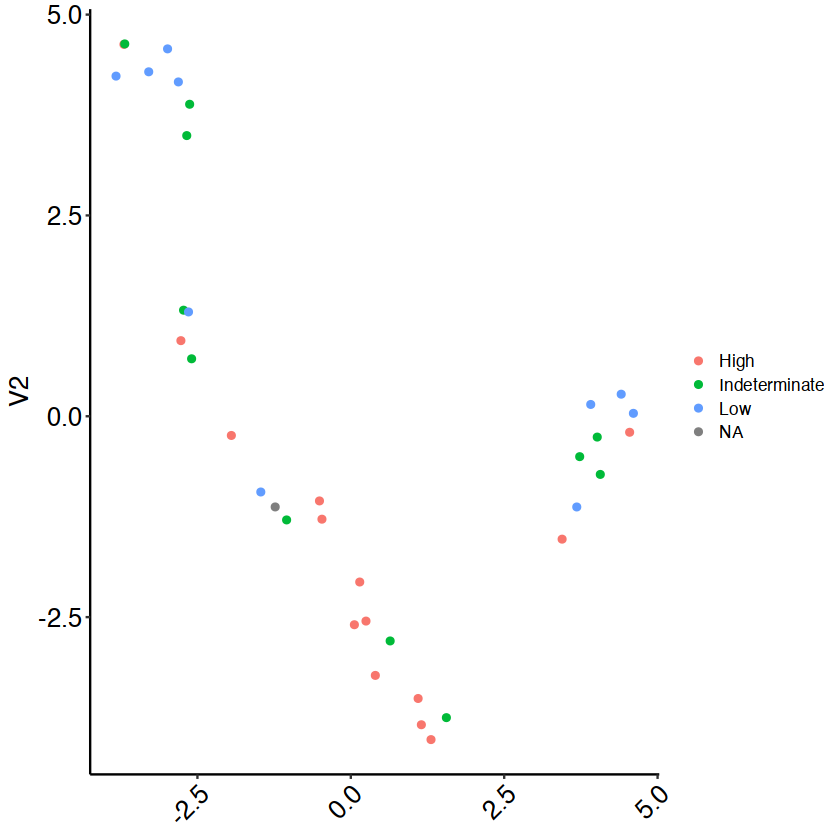

In [274]:
p1

Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


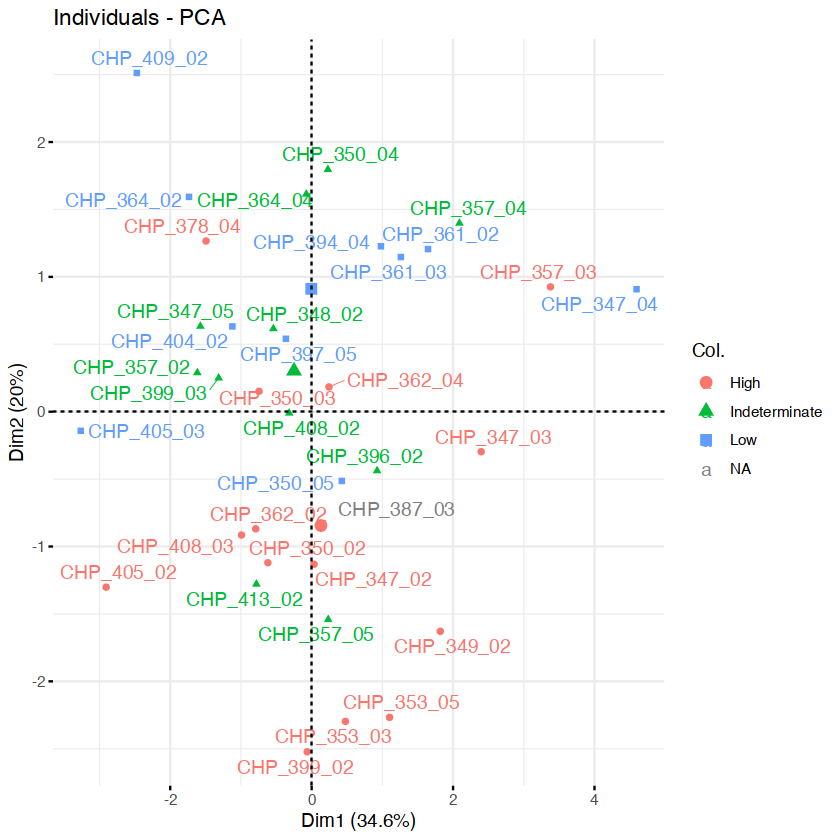

In [265]:
factoextra::fviz_pca_ind(mypca, col.ind = result_noX01$foldgroup, repel = T)

In [246]:
hm <- Heatmap(t(scale(diff_mat)))

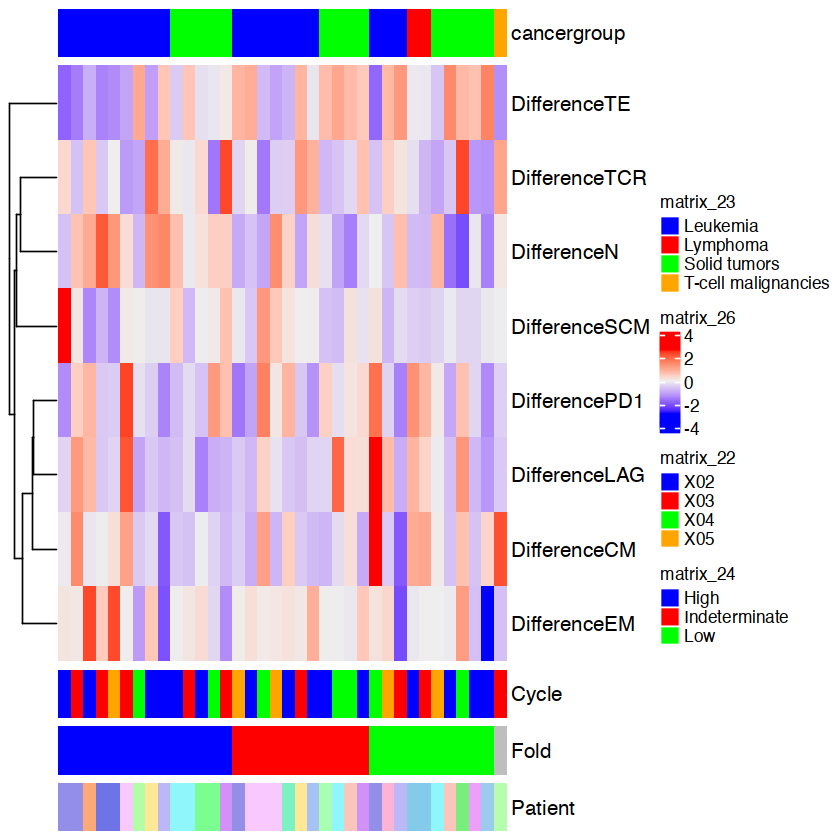

In [247]:
sample_hm %v% hm %v%  cycle_hm %v%  group_hm %v% pts_hm

In [ ]:
head(diff_mat)

In [ ]:
hm <- Heatmap(cor(t(diff_mat)))

In [ ]:
hm %v% cycle_hm %v% sample_hm %v% group_hm %v% pts_hm

In [ ]:
cormat <- cor(t(diff_mat))

In [ ]:
library(ConsensusClusterPlus)

In [ ]:
head(diff_mat)

In [ ]:
results <- ConsensusClusterPlus(t(scale(diff_mat)),
    maxK = 8, reps = 200, pItem = 0.8, pFeature = 1,
    clusterAlg = "km", distance = "euclidean",
    seed = 888, writeTable = FALSE, title = "clusters_IM", plot = "png"
)


In [ ]:
result_noX01$class <- as.numeric(results[[6]]$consensusClass)

In [ ]:
hm <- Heatmap(t(scale(diff_mat)))

In [ ]:
myclasshm <- Heatmap(t(result_noX01$class))

In [ ]:
myclasshm %v% hm %v% cohort_hm %v% cycle_hm %v% sample_hm %v% group_hm %v% pts_hm

# Heatmap all values

In [275]:
allpbmcs <- pbmc1

In [306]:
allpbmcs$cfTCR_shann <- cfdna[ match(allpbmcs$sample_id, cfdna$sample_id), "log10shann"]

In [307]:
allpbmcs <- allpbmcs[ !is.na(allpbmcs$cfTCR_shann), ]
allpbmcs <- allpbmcs[ !is.na(allpbmcs$`LAG3%`), ]
allpbmcs <- allpbmcs[ !is.na(allpbmcs$`PD1%`), ]
allpbmcs <- allpbmcs[ !is.na(allpbmcs$log10shann), ]

In [308]:
mymat <- as.matrix(allpbmcs[, c( 
    "Naïve%", "SCM%", "CM%", "EM%", "TE%",
    "LAG3%", "PD1%", "log10shann", "cfTCR_shann"
)])


In [309]:
rownames(mymat) <- allpbmcs$sample_id

In [310]:
makematrix_4hm <- function(df, var, name ){
    mymat <- df[[var]]
names(mymat) <- df[["sample_id"]]
mymat <- t(as.matrix(mymat))
rownames(mymat) <- name
    
    return(mymat)
}

In [311]:
mycohort <- makematrix_4hm(allpbmcs, "Disease_type", "disease")
mycycle <- makematrix_4hm(allpbmcs, "cycle", "Cycle")
mysample <- makematrix_4hm(allpbmcs, "cancergroup", "cancergroup")
mygroup <- makematrix_4hm(allpbmcs, "foldgroup", "Fold")

In [328]:
allpbmcs$Relapse[is.na(allpbmcs$Relapse)] <- 0
allpbmcs$Relapse <- as.factor(allpbmcs$Relapse)

In [329]:
myrelapse <- makematrix_4hm(allpbmcs, "Relapse", "Relapse")

In [330]:
rel_col <- c("blue", "red")
names(rel_col) <- names(table(allpbmcs$Relapse))

In [312]:
group_col <- c("blue", "red", "green")
names(group_col) <- names(table(allpbmcs$foldgroup))

In [313]:
# cohort_col <- c("blue", "red", "green", "orange", "purple", "yellow", "black", "grey", "pink", 
# "brown", "cyan", "magenta", "navy", "maroon", "gray","gold", "darkgreen") 
# names(cohort_col) <- names(table(allpbmcs$Disease_type))

In [314]:
cycle_col <- c("blue", "red", "green", "orange", "purple", "yellow")
names(cycle_col) <- names(table(allpbmcs$cycle))

In [315]:
type_col <- c("blue", "red", "green", "orange", "purple")
names(type_col) <- names(table(allpbmcs$cancergroup))

In [316]:
# cohort_hm <- Heatmap(mycohort, col = cohort_col, height = unit(1,"cm"))
cycle_hm <- Heatmap(mycycle, col = cycle_col, , height = unit(1,"cm"))
sample_hm <- Heatmap(mysample, col = type_col, , height = unit(1,"cm"))
group_hm <- Heatmap(mygroup, col = group_col, , height = unit(1,"cm"))

In [331]:
rel_hm <- Heatmap(myrelapse, col = rel_col, , height = unit(1,"cm"))

In [317]:
mypts <- makematrix_4hm(allpbmcs, "Patient", "Patient")

In [318]:
pts_hm <- Heatmap(mypts,  height = unit(1,"cm"), show_heatmap_legend = FALSE, show_column_names = FALSE)

In [333]:
hm <- Heatmap(t(scale(mymat)))

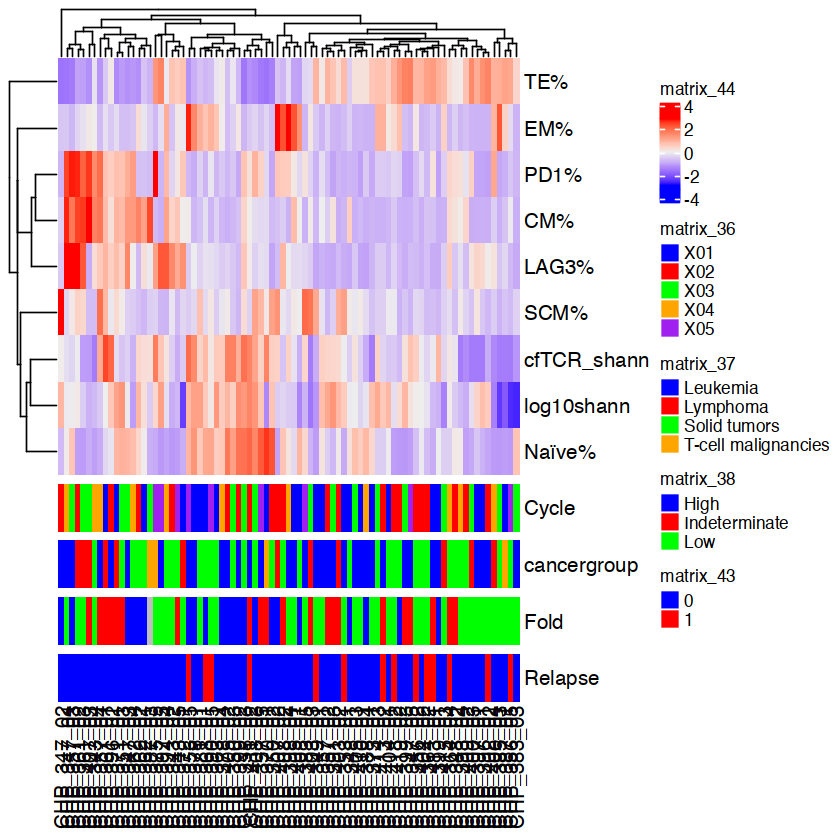

In [334]:
hm %v% cycle_hm %v% sample_hm %v% group_hm %v% rel_hm

In [335]:
pdf(paste0(plotpath, "heatmap_samples_immunediv.pdf"))
hm %v% cycle_hm %v% sample_hm %v% group_hm %v% rel_hm
dev.off()

pdf 
  2

In [338]:
hm <- Heatmap(cor(mymat, method = "spearman"), show_row_names = TRUE)

In [339]:
pdf(paste0(plotpath, "heatmap_vars_cor.pdf"))
hm 
dev.off()

pdf 
  2

In [326]:
pdf(paste0(plotpath, "heatmap_samples_cor.pdf"))
hm %v% cycle_hm %v% sample_hm %v% group_hm %v% pts_hm
dev.off()

pdf 
  2

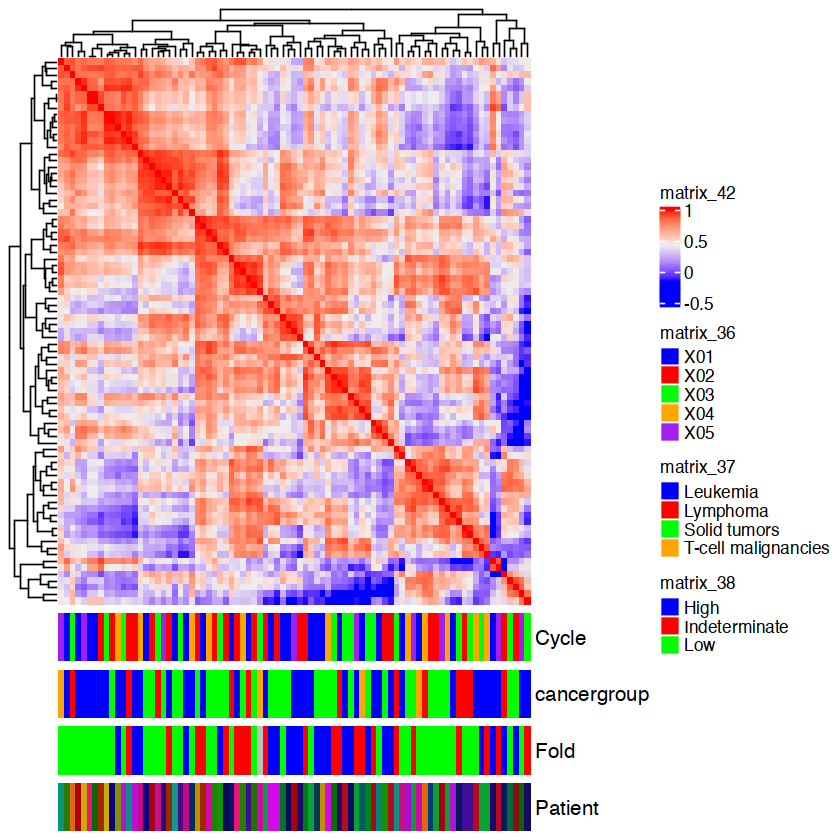

In [327]:
hm %v% cycle_hm %v% sample_hm %v% group_hm %v% pts_hm

# Backup

In [ ]:
pbmc1 <- meta_div[ meta_div$sampletype == "PBMC" & !is.na(meta_div$CD3),]
pbmc1 <- pbmc1[ pbmc1$CD3 > 0,]

In [ ]:
mycells <- c("Naïve%", "SCM%", "CM%", "EM%", "TE%", "LAG3%", "TIM3%", "PD1%")

In [ ]:
mydiff <- calculate_delta.fx(pbmc1, "cycle", "`Naïve%`")

In [ ]:
head(mydiff$cycle)

[1] "X02" "X03" "X04" "X05" "X01" "X02"

In [ ]:
# tmp <- mydiff[ mydiff$cancergroup %in% c("Leukemia", "Solid tumors"),]

In [ ]:
# subset to samples with no NA in `Naïve%`, `CM%`, `EM%`, `TEMRA%`. use apply
# to subset to samples with no NA in any of these columns
pbmc1 <- pbmc1[ apply(pbmc1[ , mycells], 1, function(x) !any(is.na(x)) ), ]

In [ ]:
gg_list <- list()

mycells <- c("`Naïve%`", "`SCM%`", "`CM%`", "`EM%`", "`TE%`", "`LAG3%`", "`TIM3%`", "`PD1%`")

for (i in 1:length(mycells)) {
    pbmc1$grp <- gsub("`", "", mycells[i])
    mydiff <- calculate_delta.fx(pbmc1, "cycle", mycells[i])
    p0 <- delta_basespiderplot.fx(mydiff, "cycle", "cancergroup", group_col)

    p0 <- p0 + geom_hline(yintercept = 0, linetype = "dashed", color = "grey")

    # get the last timepoint for each patient
    last_timepoint <- mydiff %>%
        group_by(Patient) %>%
        filter(cycle == max(cycle))
last_timepoint$cycleno <- as.numeric(gsub("X0", "", last_timepoint$cycle) )

    p0 <- p0 + geom_text_repel(
        data = last_timepoint,
        aes(label = Patient),
        hjust = "left",
        direction = "y",
          nudge_x = 6.5 - last_timepoint$cycleno,
        
        size = 3,
        xlim = c(6, NA),
        segment.color = NA,
    ) + 
        facet_nested(~ grp + cancergroup, nest_line = element_line(linetype = 1), switch = "y", axes = "all", remove_labels = "all") +
        theme(
            axis.title.y = element_blank(),
            strip.background = element_blank(),
            strip.text = element_text(size = 15),
            strip.placement = "outside",
            legend.position = "none",
            panel.border = element_rect(color = "black", fill = NA, size = 0.5),
            ggh4x.facet.nestline = element_line(colour = "black", linewidth = 0.3),
            axis.text.x = element_text(size = 10)
        ) +  scale_x_discrete(get_breaks("cycle"), labels = c("Pre-cycle 1", "Pre-cycle 2", "Pre-cycle 3", "Pre-cycle 4", "Pre-cycle 5"), expand = expansion(mult = c(0.1, 0.8)))

    gg_list[[i]] <- p0
}


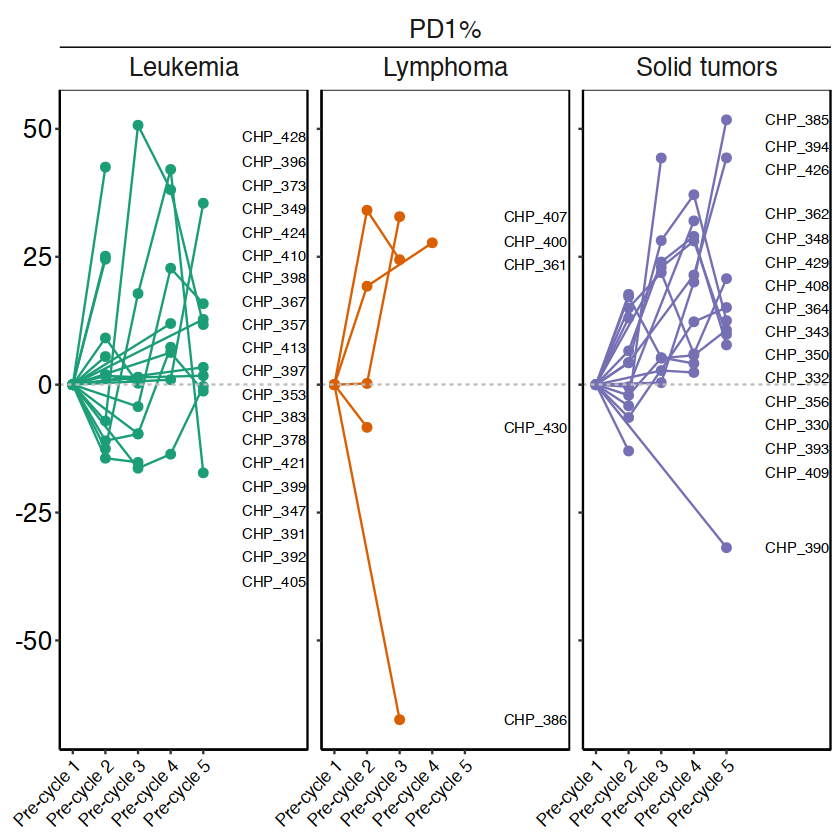

In [ ]:
p0

In [ ]:
allp <- cowplot::plot_grid(plotlist=gg_list, nrow = 2, align = "h")

In [ ]:
pdf(paste0(plotpath, "delta_Tcellsubsets_cancergroup_facet.pdf"), width = 25, height = 10)
allp
dev.off()

Warning message:
“ggrepel: 11 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 5 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


pdf 
  2

## Plots for chemo cycles - paired samples

### PBMC

In [ ]:
mytab <- table(pbmc$Patient, pbmc$cycle)

In [ ]:
paired_patients <- rownames(mytab)[rowSums(mytab == 1) == 5]

In [ ]:
paired_patients

In [ ]:
paired_pbmc <- pbmc[ pbmc$Patient %in% paired_patients,]

In [ ]:
# ggplot(paired_pbmc, aes(x= cycle, y= log10shann, group = Patient) ) + 
# facet_grid(Patient ~ ., scales = "free_y") + 
# geom_line()

### cfDNA

In [ ]:
mytab <- table(cfdna$Patient, cfdna$cycle)

In [ ]:
paired_patients <- rownames(mytab)[rowSums(mytab == 1) >= 4]

In [ ]:
paired_cfdna <- cfdna[ cfdna$Patient %in% paired_patients,]

In [ ]:
p_cfdna_paired <- ggplot(
  paired_cfdna,
  aes(x = cycle, y = log10shann)
) +
#  geom_boxplot() + #  
  geom_point(aes(color = cancergroup), cex = 2) +
  geom_line(aes(group = Patient, color = cancergroup)) + 
  scale_color_manual(values= group_col) +
  myplot +
  myaxis +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_blank()
  ) +
  annotation_logticks(sides = "l") +
  scale_y_continuous(breaks = log10(c(1,10,100) ) , labels = c(1,10,100)) +
 # labs(title = "Observed Shannon Diversity by Cycle - PBMC (n = 234)\nBH corrected p", y = "Observed Shannon Diversity") +
  facet_wrap(~cancergroup, nrow = 1)

In [ ]:
p_cfdna_paired